# 实验三

## 0.数据导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import random
from pylab import rcParams
from tkinter import _flatten
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_excel('第5章  抽样估计.xlsx',sheet_name=1)
perfume_data = pd.read_excel('香水.xlsx')

## 1.第一题

In [3]:
data

,学生编号,月消费支出额（元）
0,1,410
1,2,350
2,3,466
3,4,385
4,5,500
...,...,...
105,106,811
106,107,1109
107,108,1276
108,109,745


### 1.1大样本条件下总体均值的区间估计
计算110名学生的月平均消费额，并据此估计该校学生的月平均消费额，假设区间的置信水平为95%

#### 1.1.1计算样本均值和标准差

In [4]:
mean_avg = data['月消费支出额（元）'].mean()
print("大样本均值为：",mean_avg)

大样本均值为： 597.0181818181818


In [5]:
std_avg = data['月消费支出额（元）'].std()
print("大样本标准差：", std_avg)

大样本标准差： 156.96291748229515


#### 1.1.2计算边际误差或允许误差
边际误差：$ E = |z_{\frac \alpha2}| \frac s{\sqrt n} $

In [6]:
level = 0.95
alpha = 1 - level
n_sample = len(data)
z = stats.norm.ppf(alpha / 2,loc=0,scale=1) # 均值为 0 且标准差为 1 的正态分布位数
E = -z * std_avg / (math.sqrt(n_sample))
print("边际误差E为：{:.2f}".format(E))

边际误差E为：29.33


#### 1.1.3确定总体均值的置信区间
均值的置信区间： $ \bar x \pm z_{\frac \alpha2} \frac \sigma{\sqrt n} $

In [7]:
l = mean_avg - E
r = mean_avg + E
print("置信区间为({:.2f},{:.2f})".format(l,r))

置信区间为(567.69,626.35)


结论：<br>
在置信水平为95%的条件下，110名学生的月销售额估计的该校学生的月销售额的置信区间为(567.69,626.35)

### 1.2小样本条件下总体均值的区间估计

In [8]:
sample_data = data.iloc[random.sample(range(n_sample),20)]
sample_data

,学生编号,月消费支出额（元）
27,28,464
10,11,399
5,6,550
85,86,575
105,106,811
49,50,680
32,33,617
97,98,910
8,9,470
11,12,445


#### 1.2.1计算样本均值

In [9]:
sample_mean = data['月消费支出额（元）'].mean()
print("小样本均值为：",sample_mean)
sample_std = data['月消费支出额（元）'].std()
print("小样本标准差：", sample_std)

小样本均值为： 597.0181818181818
小样本标准差： 156.96291748229515


#### 1.2.2计算边际误差或允许误差
边际误差：$ E = t_{\frac \alpha2}(n - 1) \frac s{\sqrt n} $

In [10]:
level = 0.95
alpha = 1 - level
random_sample_length = len(sample_data)
t = stats.t.ppf(1 - alpha / 2,random_sample_length - 1) # (n - 1)的t分布位数
E_sample = -z * sample_std / (math.sqrt(random_sample_length))
print("边际误差E为：{:.2f}".format(E_sample))

边际误差E为：68.79


#### 1.2.3确定总体均值的置信区间

In [11]:
l_sample = sample_mean - E_sample
r_sample = sample_mean + E_sample
print("小样本的置信区间为({:.2f},{:.2f})".format(l_sample,r_sample))

小样本的置信区间为(528.23,665.81)


结论：<br>
在置信水平为95%的条件下，由20名学生的月销售额估计的该校学生的月销售额的置信区间为(528.23,665.81)

### 1.3总体比例的区间估计
计算月消费额超过600元的学生所占的比例

In [12]:
df = data[data['月消费支出额（元）'] >= 600]
print(len(df))
df

40


,学生编号,月消费支出额（元）
9,10,655
15,16,660
18,19,748
29,30,678
32,33,617
38,39,779
45,46,629
47,48,710
48,49,650
49,50,680


#### 1.3.1计算样本比例

In [13]:
propotion = len(df) / n_sample
propotion

0.36363636363636365

#### 1.3.2计算样本比例的标准差

In [14]:
pro_std = math.sqrt(propotion * (1 - propotion))
pro_std

0.48104569292083466

#### 1.3.3确定总体比例的置信区间

In [15]:
z_p = stats.norm.ppf(alpha / 2,loc=0,scale=1)

p_l = propotion - math.fabs(z_p) * pro_std / (math.sqrt(n_sample))
p_r = propotion + math.fabs(z_p) * pro_std / (math.sqrt(n_sample))
print("样本比例的区间估计为：({:.2f}%,{:.2f}%)".format(p_l * 100,p_r * 100))

样本比例的区间估计为：(27.37%,45.35%)


## 2.第二题

In [16]:
perfume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   商品名称    1009 non-null   object 
 1   产品毛重    1009 non-null   object 
 2   商品产地    489 non-null    object 
 3   包装      1007 non-null   object 
 4   香调      1005 non-null   object 
 5   净含量     1007 non-null   object 
 6   分类      1008 non-null   object 
 7   性别      1009 non-null   object 
 8   适用场所    969 non-null    object 
 9   价格      1009 non-null   float64
 10  评价      1009 non-null   object 
dtypes: float64(1), object(10)
memory usage: 86.8+ KB


In [17]:
perfume_data

,商品名称,产品毛重,商品产地,包装,香调,净含量,分类,性别,适用场所,价格,评价
0,冰希黎6956008601463,10.00g,中国大陆上海,Q版香水,花果香调,1ml-15ml,浓香水EDP,女,日常，约会，情趣，商务，party聚会，旅行,9.9,1.9万+
1,冰希黎6956008601432,200.00g,中国大陆上海,Q版香水,混合香调,1ml-15ml,浓香水EDP,女,日常，约会，party聚会，运动，旅行,9.9,1.9万+
2,（免邮）上海老国货艾琳法国茉莉女士香水75ml EDP 持久淡香清新花香调,160.00g,NaN,独立装,花果香调,31ml-100ml,浓香水EDP,女,日常，约会，商务，party聚会，旅行,18.0,90+
3,法颂浪漫梦境女士香膏15g 持久淡香清新固体精油香水香体膏 女士持久淡香礼盒,15.00g,NaN,Q版香水,花果香调,1ml-15ml,固体香水/香膏,女,日常，约会，商务，party聚会，运动，旅行,22.0,30+
4,雅芳香水,30.00g,中国大陆,独立装,东方香调,1ml-15ml,淡香水EDT,女,日常，约会，商务，party聚会，运动，旅行,23.9,3.9万+
...,...,...,...,...,...,...,...,...,...,...,...
1004,香奈儿香水,300.00g,法国,独立装,花果香调,31ml-100ml,浓香水EDP,女,日常，约会，商务，party聚会，旅行,1420.0,5000+
1005,香奈儿机会/机遇/黄色邂逅女士香水50/100ML/持久淡香精EDP EDP50ml,20.00g,NaN,独立装,花果香调,31ml-100ml,浓香水EDP,女,约会,1850.0,3
1006,Chanel香奈儿 COCO可可小姐 淡香水EDT 白色 EDP 100ml,200.00g,NaN,礼品套装,花果香调,31ml-100ml,淡香水EDT,女,日常，约会,1996.0,0
1007,Dior克丽丝汀迪奥女士香水套装 魅惑+花漾+真我各50ml三件套,200.00g,NaN,独立装,东方香调,31ml-100ml,淡香水EDT,女,日常，约会，商务，party聚会，运动，旅行,2200.0,10+


### 2.1香水种类

,count
,商品名称
分类,
其它,60
发香雾,12
古龙水,2
固体香水/香膏,3
浓香水EDP,265
淡香水EDT,651
淡香水EDT，古龙水,3
香体走珠,6


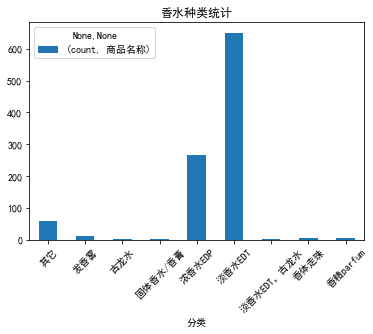

In [18]:
category = perfume_data.pivot_table(index=['分类'],values=['商品名称'],aggfunc=['count'])

category.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('香水种类统计')
category

香水种类最多的为：淡香水EDT，其次是浓香水EDP

### 2.2香水产地

In [19]:
perfume_data['商品产地'].unique()

array(['中国大陆上海', nan, '中国大陆', '广州', '广东', '中国广东', '浙江义乌', '浙江', '法国',
       '意大利', '英国', '德国', '美国', '德国/美国', '西班牙', '美国/法国', '法国  摩纳哥',
       '法国/美国'], dtype=object)

In [20]:
China_place = ['中国大陆上海', '中国大陆', '广州', '广东', '中国广东', '浙江义乌', '浙江']
Other_place = ['法国','意大利', '英国', '德国', '美国', '德国/美国', '西班牙','法国/美国']
place_dict = {}
for i in range(len(China_place)):
    place_dict[China_place[i]] = '中国'
for i in range(len(Other_place)):
    place_dict[Other_place[i]] = Other_place[i]
place_dict['美国/法国'] = '法国/美国'
place_dict['法国  摩纳哥'] = '法国'
# place_dict
df = perfume_data
df['商品产地'] = df['商品产地'].map(place_dict)
df['商品产地'].unique()

array(['中国', nan, '法国', '意大利', '英国', '德国', '美国', '德国/美国', '西班牙', '法国/美国'],
      dtype=object)

array([<AxesSubplot:ylabel='(count, 商品名称)'>], dtype=object)

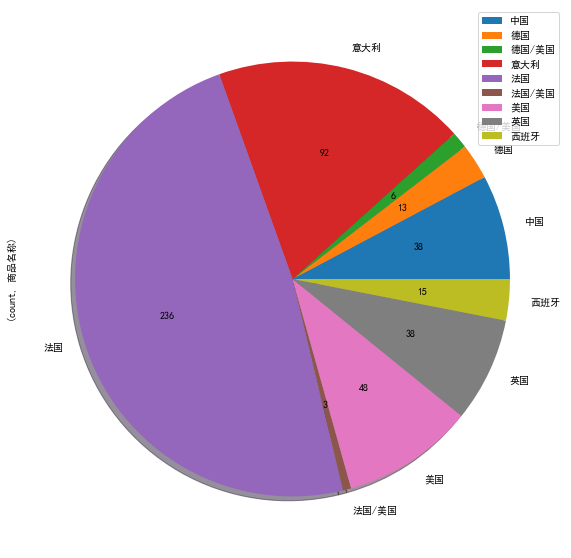

In [21]:
place = df.pivot_table(index=['商品产地'],values=['商品名称'],aggfunc=['count'])

val = list(place.values.flatten()) # val = [38, 13, 6, 92, 236, 3, 48, 38, 15]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

# plt.pie(val,labels=place.index, autopct=make_autopct(val),shadow=True)
place.plot(kind='pie',subplots=True,figsize=(10, 10),shadow=True,autopct=make_autopct(val))

In [22]:
perfume_data['商品产地'].isnull().sum() # 产地缺失-520条记录

520

香水大多数来源于法国，其次是意大利、美国、中国

### 2.3香水价格

,计数
100元以下,138
100-300元,261
300-500元,271
500-1000元,296
1000-1500元,39
1500-2000元,2
2000元以上,2


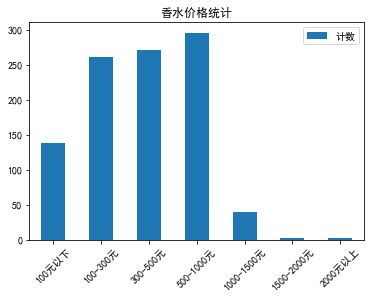

In [23]:
# perfume_price = perfume_data.pivot_table(index=['价格'],values=['商品名称'],aggfunc=['count'])

bins = [0,100,300,500,1000,1500,2000,3000]
labels = ['100元以下','100-300元','300-500元','500-1000元','1000-1500元','1500-2000元','2000元以上']
df_price = pd.cut(perfume_data['价格'],bins,right=False,labels=labels)
df_price = pd.DataFrame(df_price.value_counts(sort=False))  # sort=False 防止2500以下跑到中间去.（buzhi
df_price.columns = ['计数']
df_price.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('香水价格统计')
df_price

香水价格主要为500-1000元之间，100-500价位的顾客也偏多<br>
这说明香水作为奢侈品，大多数会选择价格稍微偏高一点的产品

### 2.4香水净含量、香调、包装

Text(0.5, 1.0, '香水净含量统计')

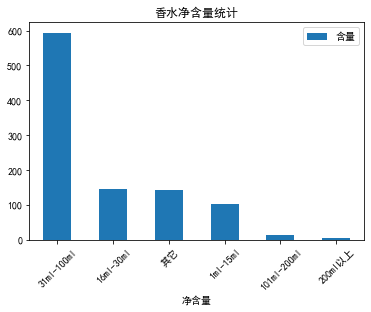

In [24]:
perfume_content = perfume_data.pivot_table(index=['净含量'],values=['商品名称'],aggfunc=['count'])

perfume_content.columns = ['含量']
perfume_content.sort_values(by=['含量'],ascending=False).plot(kind='bar')

plt.xticks(rotation=45)
plt.title('香水净含量统计')

,统计
香调,
东方香调,60
其它,68
木质香调,46
木质香调，东方香调，混合香调,1
海洋香调,3
混合香调,121
花果香调,702
花果香调，东方香调,1
花果香调，混合香调,3


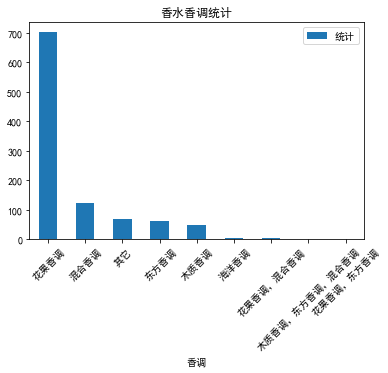

In [25]:
fragrance_note = perfume_data.pivot_table(index=['香调'],values=['商品名称'],aggfunc=['count'])

fragrance_note.columns = ['统计']
fragrance_note.sort_values(by=['统计'],ascending=False).plot(kind='bar')

plt.xticks(rotation=45)
plt.title('香水香调统计')
fragrance_note

,统计
包装,
Q版香水,56
其它,44
独立装,795
礼品套装,72
组合装,20
限量版装,20


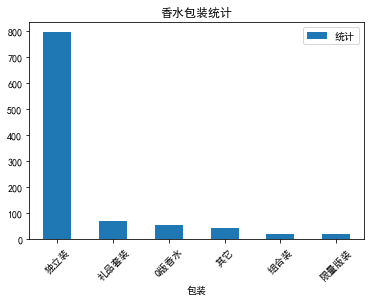

In [26]:
fragrance_pack = perfume_data.pivot_table(index=['包装'],values=['商品名称'],aggfunc=['count'])

fragrance_pack.columns = ['统计']
fragrance_pack.sort_values(by=['统计'],ascending=False).plot(kind='bar')

plt.xticks(rotation=45)
plt.title('香水包装统计')
fragrance_pack

香水市场偏好：净含量在31ml-100ml、花果香调的独立包装香水占据主流市场

### 2.5香水适用场所

In [27]:
sites = pd.DataFrame(perfume_data['适用场所'])
sites = sites['适用场所'].str.split('，',expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'适用场所'}).join(sites.drop('适用场所',axis=1))

sites['辅助'] = int(1)

df2 = sites.pivot_table(columns='适用场所',values='辅助',aggfunc='count')
# df2

Text(0.5, 1.0, '适用场所')

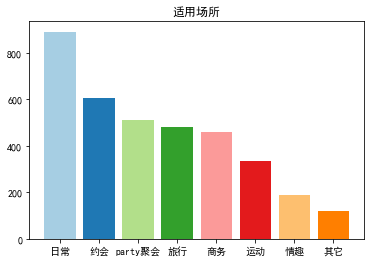

In [28]:
df3 = df2.unstack().reset_index(level=1).drop('level_1',axis=1).rename(columns={0:'次数'})
df3 = df3.sort_values(by=['次数'],ascending=False)
plt.bar(range(len(df3)), df3['次数'], color=plt.cm.Paired(np.arange(len(df3))))
xlabel = ['日常', '约会', 'party聚会', '旅行', '商务', '运动', '情趣', '其它']
plt.xticks(range(len(xlabel)),xlabel)
plt.title('适用场所')

# df3.T.plot(kind='bar', label='index')